In [1]:
import pandas as pd
data_model = pd.read_csv('modelData.csv')

In [ ]:
#predict daysWorked. only considers 100 most frequently seen parts

In [2]:
data_model = data_model.drop(columns=['daysOpen']) 

In [3]:
data_model = data_model.dropna(subset=['daysWorked'])  

In [4]:
from pycaret.regression import *
cat_features = ['PART','CONDITION', 'cause_code','deferral_reason_code', 'loc1','loc2','loc3','loc4','status_code','when_discovered_code','work_center', 'action_taken_code', 'PART_sub','CONDITION_sub']
text_features = ['equipment_nomenclature', 'def_narrative','nondef_narrative', 'closing_narrative', 'ima_narrative']
#num_features = ['totMaterialCost']
exp_name = setup(data = data_model,  target = 'daysWorked', categorical_features= cat_features, text_features= text_features, feature_selection=True, train_size = .7)
random_forest = create_model('rf')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010869 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 20983
[LightGBM] [Info] Number of data points in the train set: 6520, number of used features: 1280
[LightGBM] [Info] Start training from score 89.966104


,Description,Value
0,Session id,8816
1,Target,daysWorked
2,Target type,Regression
3,Original data shape,"(9315, 21)"
4,Transformed data shape,"(9315, 5)"
5,Transformed train set shape,"(6520, 5)"
6,Transformed test set shape,"(2795, 5)"
7,Numeric features,1
8,Text features,5
9,Categorical features,14


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17.4267,1575.6223,39.6941,0.9189,1.1567,2.6432
1,19.7913,2011.8569,44.8537,0.9182,1.2221,1.5457
2,18.3224,2080.9208,45.6171,0.9114,1.2750,2.8382
3,19.7609,2393.4847,48.9233,0.8734,1.2786,1.6876
4,19.4219,2372.4853,48.7082,0.9013,1.2433,2.3594
5,19.1518,2562.5554,50.6217,0.8767,1.2705,1.9571
6,15.6565,1493.0566,38.6401,0.9147,1.0804,1.6004
7,16.8099,1720.6345,41.4805,0.9148,1.0757,1.1457
8,17.4111,1702.3290,41.2593,0.9363,1.2115,2.5948


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

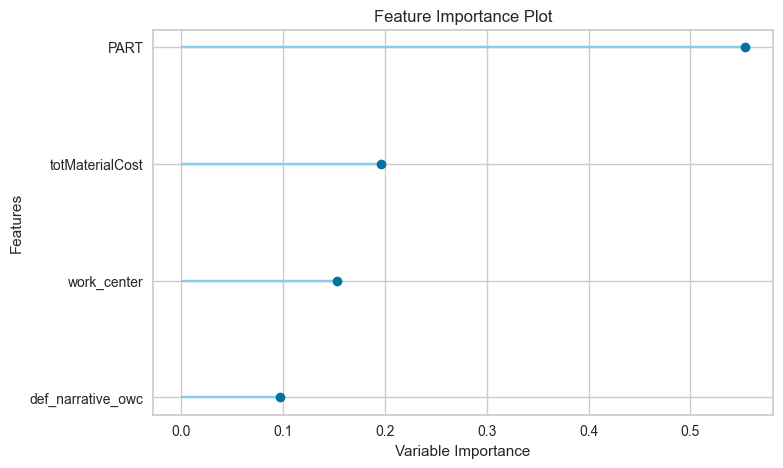

In [6]:
plot_model(random_forest,plot = 'feature')

In [7]:
#PART has feature importance > 0.6 when totMaterialCost is not included in the model, but not on importance plot when it is 